<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import classification_report

%matplotlib inline

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [114]:
import io
import requests
import ssl
import pandas as pd
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**1. Загрузить датасет**

In [3]:
dataset.isnull().sum().sum()

0

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [4]:
print('Количество элементов в классе 1 -', len(dataset.loc[dataset['Class']==1]))
print('Количество элементов в классе 2 -', len(dataset.loc[dataset['Class']==0]))

Количество элементов в классе 1 - 492
Количество элементов в классе 2 - 284315


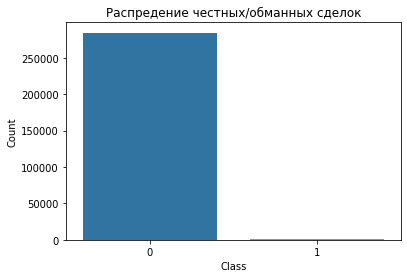

In [186]:
sns.barplot(x='Class', y = dataset.index, data=dataset, estimator=len)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Распредение честных/обманных сделок')



plt.show()


**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [5]:
a= dataset[dataset['Class']==0]['Amount'].sum()
a

25102462.04

In [6]:
b= dataset[dataset['Class']==1]['Amount'].sum()
b

60127.97

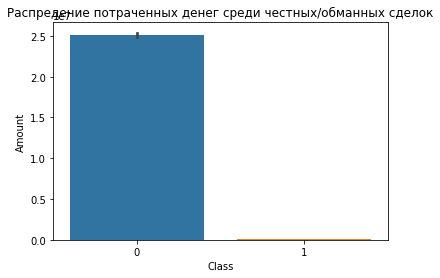

In [188]:
sns.barplot(x='Class' ,y='Amount', data=dataset, estimator=sum)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Распредение потраченных денег среди честных/обманных сделок')



plt.show()

In [190]:
#проверяю по T-критерию Стьюдента
not_fair = dataset[dataset['Class']==0]['Amount']

fair = dataset[dataset['Class']==1]['Amount']

print(stats.ttest_ind(not_fair, fair))

Ttest_indResult(statistic=-3.00555231397141, pvalue=0.002651220649191683)


p-value меньше 0.05,  группы статистически сильно отличаются

**5. Построить графики histograms для всех значений**

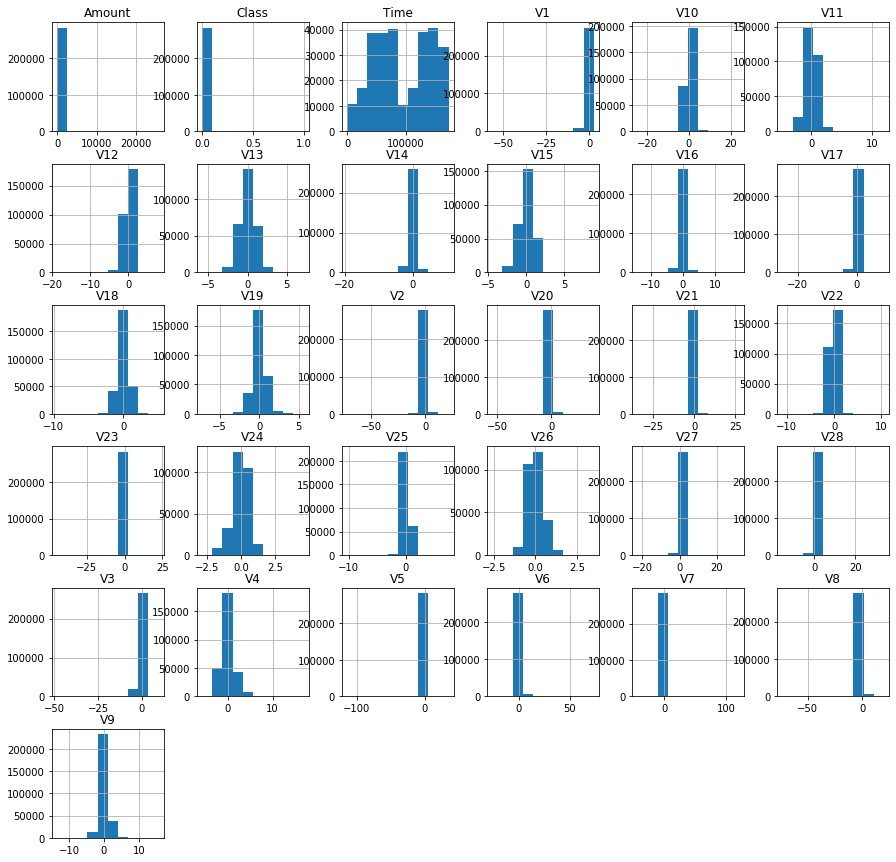

In [7]:
dataset.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

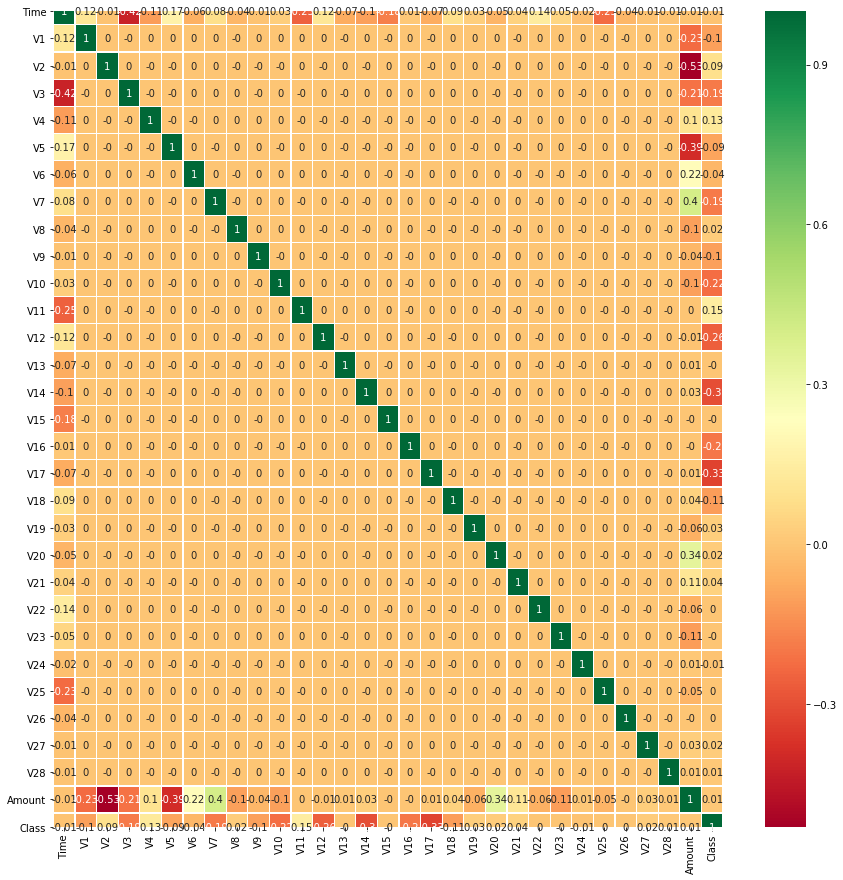

In [10]:
f, ax = plt.subplots(figsize=(15, 15))
corr = np.round_(dataset.corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)

In [21]:
#Ищу, можно ли удалить элементы с корреляцией более 95%
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop, 'Нечего удалять')


[] Нечего удалять


**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

In [25]:
print('Количество значений 1го класса: ', dataset[dataset['Class']==1].shape)
print('Количество значений 2го класса: ', dataset[dataset['Class']==0].shape)

Количество значений 1го класса:  (492, 31)
Количество значений 2го класса:  (284315, 31)


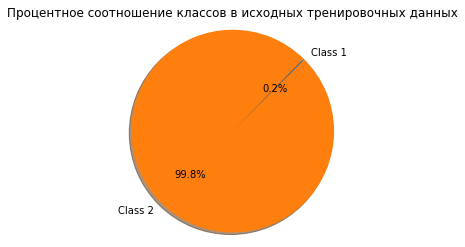

In [40]:
labels = 'Class 1', 'Class 2'
sizes = [492, 284315]
explode = (0, 0) 
fig1, ax1 = plt.subplots(figsize=(4,4))
plt.title('Процентное соотношение классов в исходных тренировочных данных')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Т.к. имеется несбалансированность данных, необходимо уравнять количество элементов в каждом классе 
засчет генерирования новых (up-sampling) или удаления элементов (down-sampling).

In [117]:
#без балансировки данных
input_x=dataset.drop(['Class'], axis = 1)

In [116]:
# таргет -значения
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#targets=(output_y.iloc[:,:]==1).idxmax(1)
targets = dataset.Class
#print(targets.value_counts())
Y_targ=le.fit_transform(targets)

In [108]:
#разделяю на тренировочные и тестовые
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x, Y_targ, test_size=0.2)

Модель Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


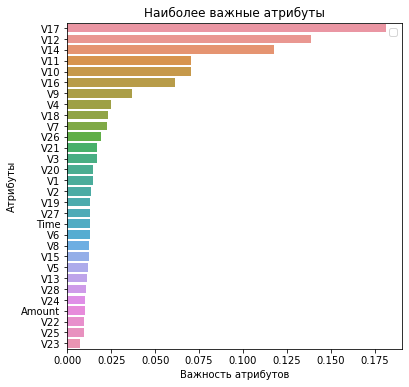

In [110]:

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Как делать classification report:

In [118]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.96      0.75      0.84        88

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



0.9995611109160493

In [ ]:
Точность предсказания практически 100%...

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [120]:
#сохраняю заголовки в отдельный список
headers1 = list(dataset.columns.values)

In [123]:
#нормализую данные
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(dataset)
dataset_Norm = pd.DataFrame(np_scaled)


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [124]:
#восстанавливаю номера колонок
dataset_Norm.columns = headers1
dataset_Norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


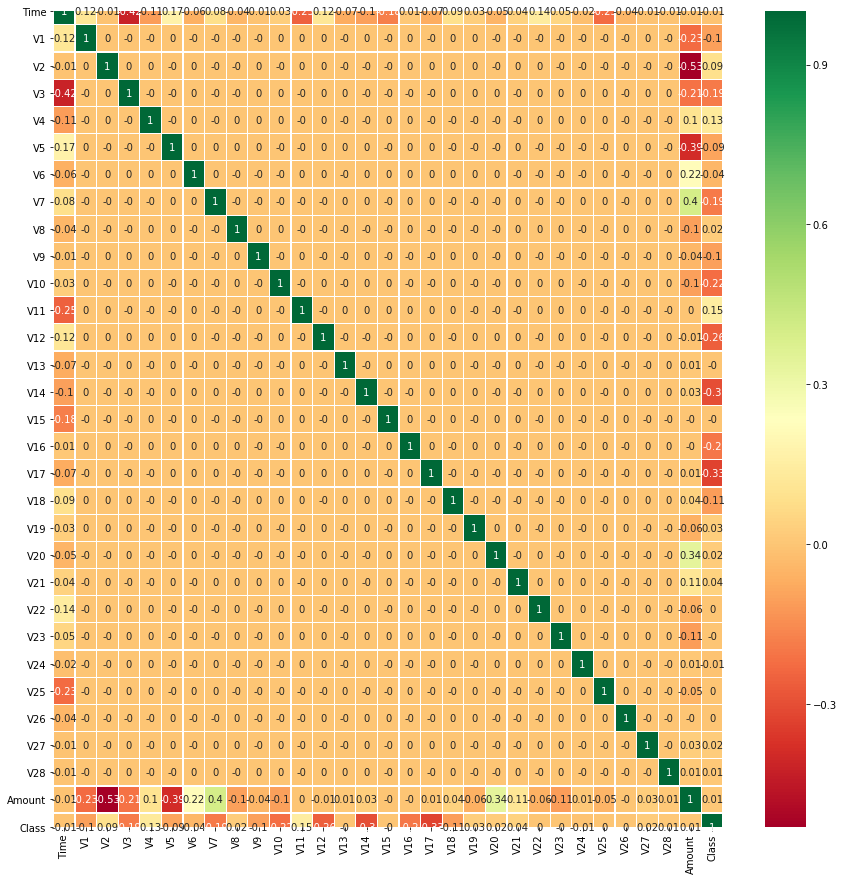

In [126]:
f, ax = plt.subplots(figsize=(15, 15))
corr1 = np.round_(dataset_Norm.corr(), decimals=2)
sns.heatmap(corr1,annot=True,cmap='RdYlGn',linewidths=0.2)

In [132]:
upper = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))

# Ищем индексы колонок с корреляцией большей чем 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

[]


In [151]:
output_y_N = dataset.Class
#input_x = dataset_temp.iloc[:,:27]
input_x_N = dataset_Norm.drop(['Class'], axis = 1)

In [152]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#targets=(output_y.iloc[:,:]==1).idxmax(1)
targets_N = dataset.Class
#print(targets.value_counts())
Y_targ_N=le.fit_transform(targets_N)

In [153]:
from sklearn.model_selection import train_test_split
X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(input_x_N, Y_targ_N, test_size=0.2)

In [154]:
# выбираем 100 деревьев в качестве параметра
model_N=RandomForestClassifier(n_estimators=100)

# обучаем модель
model_N.fit(X_train_N,y_train_N)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


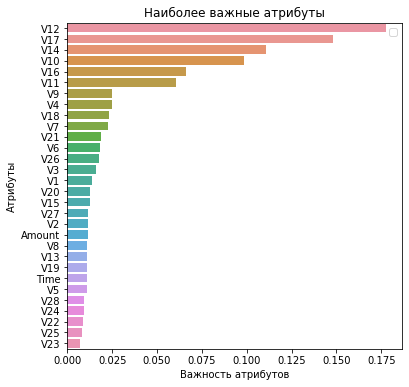

In [165]:
headers2 = list(X_train_N.columns.values)

feature_imp = pd.Series(model_N.feature_importances_,index=headers2).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [166]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.96      0.75      0.84        88

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



0.9995611109160493

    Получился такой же результат, как и без нормализации данных. Судя по всему, в методе Деревьев нормализация не обязательна.

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [157]:
  conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Sony\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    backports.functools_lru_cache-1.6.1|             py_0          11 KB
    conda-4.8.3                |           py37_0         2.8 MB
    future-0.18.2              |           py37_0         656 KB
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be REMOVED:

  python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  backports.functoo~                               1.5-py_2 --> 1.6.1-py_0
  future                                      0.17.1-py37_0 --> 0.18.2-py37_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::cond

In [158]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Sony\Anaconda3

  added / updated specs:
    - imbalanced-learn


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [159]:
#создаю из исходных данных
from sklearn.model_selection import train_test_split
X_train_Up,X_test_Up,y_train_Up,y_test_Up = train_test_split(input_x_N,
                                                 Y_targ,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [160]:
#Увеличиваю количество тренировочных данных (тестовые данные остаются нетронутыми)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train_Up, y_train_Up)
X_resampled, y_resampled = ros.fit_sample(X_train_Up, y_train_Up)
print('Количество элементов до операции:', len(X_train_Up))
print('Количество элементов после операции:', len(X_resampled))

C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in ve

Количество элементов до операции: 199364
Количество элементов после операции: 398048


C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [161]:
#тренировочные данные
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 199024, 1: 199024}

In [162]:
#тестовые данные
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 56874, 1: 88}

In [163]:
model2=RandomForestClassifier(n_estimators=100)

# обучаем модель
model2.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


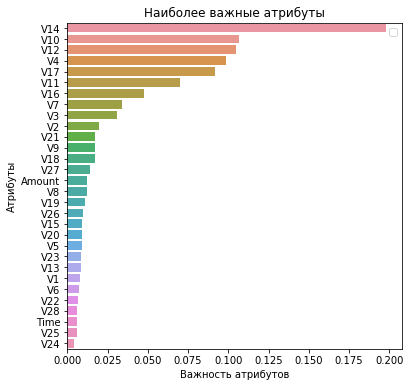

In [167]:
headers3 = list(X_train_Up.columns.values)

feature_imp = pd.Series(model2.feature_importances_,index=headers3).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [168]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.96      0.75      0.84        88

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



0.9995611109160493

Такой же результат, как и в первых двух случаях. Возможно, это связано с особенностями корреляции атрибутов в этой выборке.Либо значительным отличием в процентном соотношении между двумя классами.